# KFold vs StratifiledKFold

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/FIFA.csv')
pd.set_option('display.max_rows', 27)
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
df["Man of the Match"].describe()

count     128
unique      2
top        No
freq       64
Name: Man of the Match, dtype: object

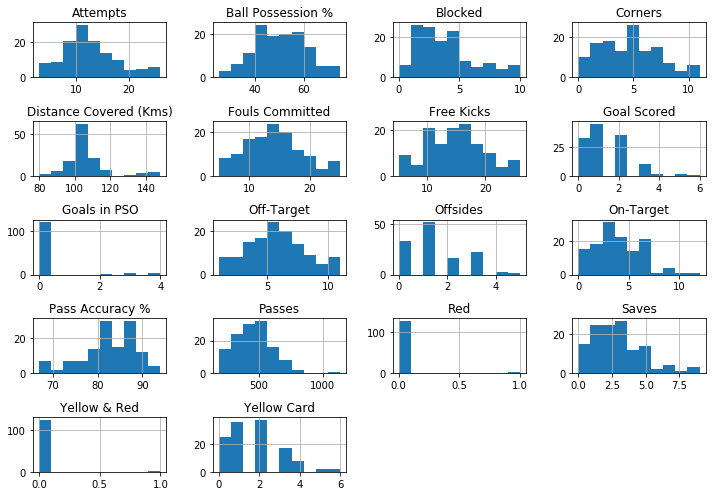

In [12]:
from pylab import rcParams

rcParams["figure.figsize"] = 10, 7
feature_names = [i for i in df.columns if df[i].dtype in [np.int64]]
data_set = df[feature_names]
data_set.hist()
plt.tight_layout()

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_validate, KFold

model = RandomForestClassifier(n_estimators=1000)

np.random.rand(4)
kf = KFold(n_splits=10, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [16]:
%%time
import pprint

from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer, f1_score, recall_score
scoring = {
    "accuracy": make_scorer(accuracy_score), "kappa": make_scorer(cohen_kappa_score)
}

scores_kf = cross_validate(
    model, data_set, df["Man of the Match"], cv=kf, n_jobs=-1, scoring=scoring
)

scores_skf = cross_validate(
    model, data_set, df["Man of the Match"], cv=skf, n_jobs=-1, scoring=scoring
)


CPU times: user 423 ms, sys: 155 ms, total: 579 ms
Wall time: 48.5 s


In [17]:
pprint.pprint(scores_kf)
pprint.pprint(scores_skf)

{'fit_time': array([9.64397573, 9.37950063, 9.77961445, 9.47802949, 9.55023122,
       9.43366361, 9.43035579, 9.60973167, 9.51391268, 9.70506763]),
 'score_time': array([1.06426287, 0.98413205, 0.984308  , 0.99257398, 1.03373504,
       0.94136906, 0.8956089 , 0.82970691, 0.83782578, 0.62289095]),
 'test_accuracy': array([0.53846154, 0.61538462, 0.61538462, 0.76923077, 0.53846154,
       0.76923077, 0.76923077, 0.84615385, 0.75      , 0.75      ]),
 'test_kappa': array([-0.05405405,  0.26966292,  0.23529412,  0.53012048,  0.09302326,
        0.53012048,  0.49350649,  0.69047619,  0.5       ,  0.5       ])}
{'fit_time': array([9.32911325, 9.37821913, 9.4599092 , 9.6555779 , 9.69822359,
       9.27523661, 9.51879168, 9.64017725, 9.6908617 , 9.78130031]),
 'score_time': array([0.97759724, 0.94902825, 0.98960519, 0.99784636, 0.97898006,
       0.86204505, 0.86367965, 0.80494595, 0.69576359, 0.63089967]),
 'test_accuracy': array([0.5       , 0.64285714, 0.57142857, 0.64285714, 0.91666667,
